<a href="https://colab.research.google.com/github/sachsac/teaching_data/blob/Hours_Analysis/TA_Hours_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('/content/drive/MyDrive/Work/Independent Projects/TA work/TA helping.xlsx', usecols=['Cohort', 'Day of week','Time in Military', 'Off Hours Request? Y/N'])
df.head()

,Cohort,Day of week,Time in Military,Off Hours Request? Y/N
0,Sherlin,Wed,1812,No
1,Sherlin,Sun,1927,Yes
2,Josh,Wed,2016,No
3,Josh,Thu,2305,No
4,Josh,Wed,2125,No


In [19]:
#how much of a sample size do we have?
df.info() # number of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cohort                  45 non-null     object
 1   Day of week             47 non-null     object
 2   Time in Military        47 non-null     int64 
 3   Off Hours Request? Y/N  47 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


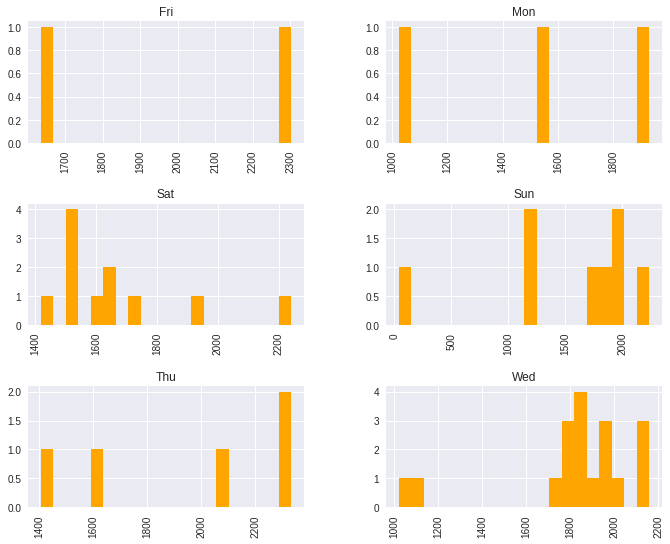

In [20]:
df['Time in Military'].hist(by = df['Day of week'], bins = 20, color = 'orange')
plt.rcParams["figure.figsize"] = (11, 9);

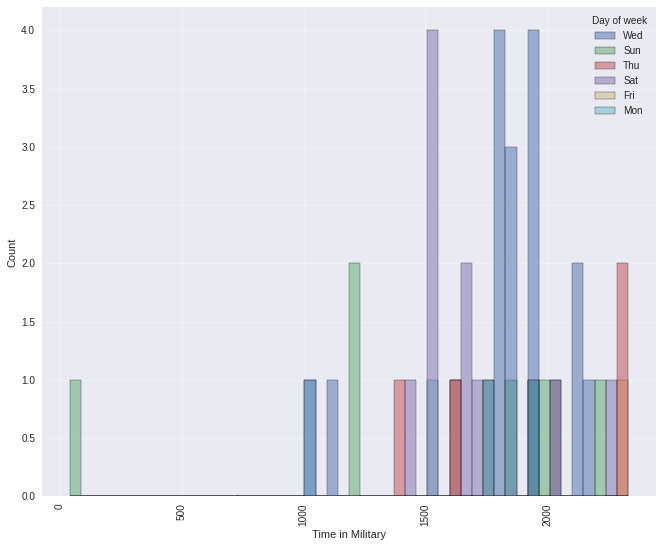

In [21]:
sns.histplot(data = df, x='Time in Military',hue = "Day of week", bins = 50)
plt.grid(alpha = 0.3)
plt.xticks(rotation = 90);

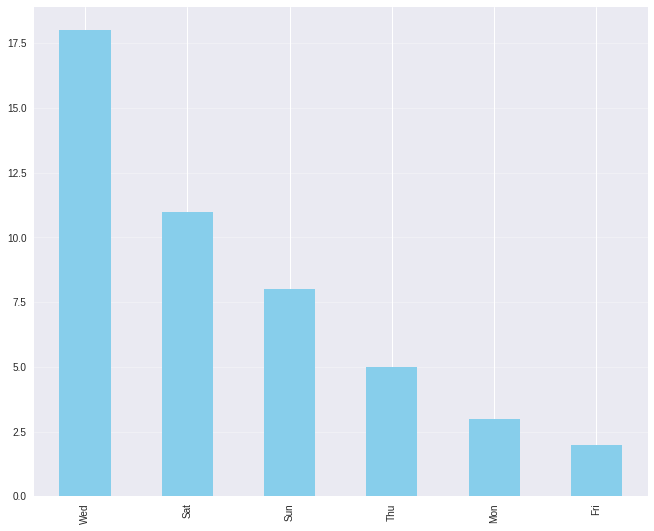

In [22]:
df['Day of week'].value_counts().plot(kind= 'bar', color= 'skyblue')
plt.grid(axis='y', alpha = 0.3);

The above information is slightly skewed, as I have the most hours on Wednesdays, so it makes sense for the most students to approach me on Wednesdays.

In [23]:
thursdays = df[df['Day of week'] == 'Thu']
thursdays.head()

,Cohort,Day of week,Time in Military,Off Hours Request? Y/N
3,Josh,Thu,2305,No
11,Sherlin,Thu,2057,No
14,Josh,Thu,2332,No
33,Brenda,Thu,1405,Yes
39,Josh,Thu,1616,Yes


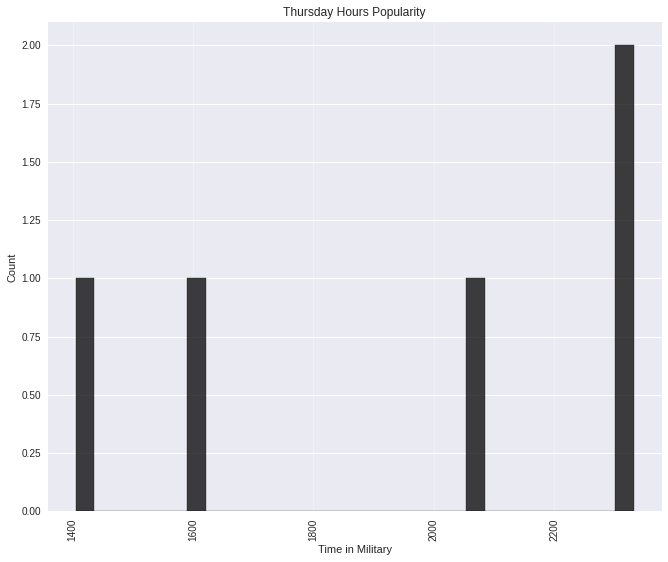

In [24]:
sns.histplot(data = thursdays, x='Time in Military', bins = 30, color='black')
plt.xticks(rotation = 90)
plt.grid(axis='x', alpha = 0.3)
plt.title('Thursday Hours Popularity');

In [25]:
wednesdays = df[df['Day of week'] == 'Wed']
wednesdays.head()

,Cohort,Day of week,Time in Military,Off Hours Request? Y/N
0,Sherlin,Wed,1812,No
2,Josh,Wed,2016,No
4,Josh,Wed,2125,No
5,Josh,Wed,1954,No
6,Josh,Wed,1752,No


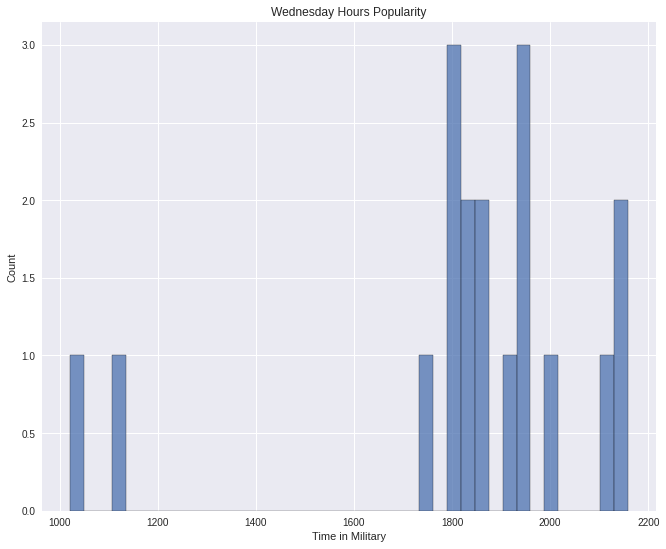

In [26]:
sns.histplot(data = wednesdays, x='Time in Military', bins =  40)
plt.title('Wednesday Hours Popularity');

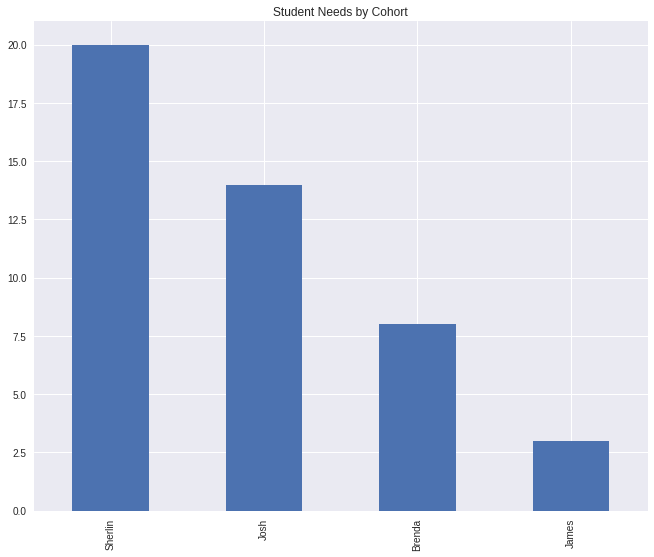

In [27]:
df['Cohort'].value_counts().plot(kind='bar')
plt.title('Student Needs by Cohort');

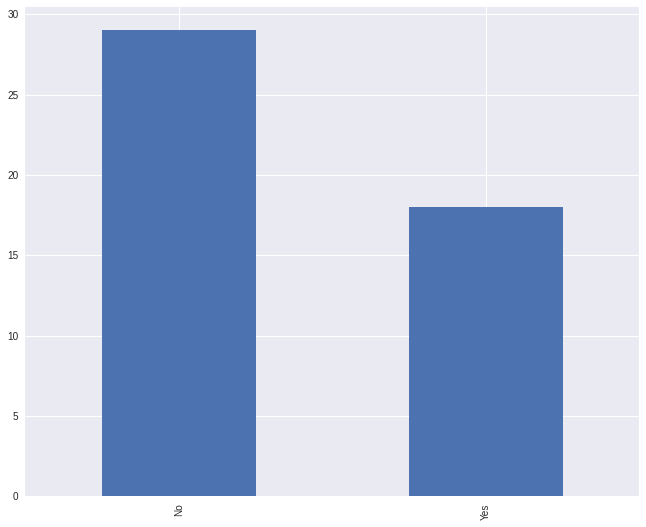

In [28]:
#off hours. How much am I getting contacted outside of my hours?

df['Off Hours Request? Y/N'].value_counts().plot(kind= 'bar')

In [29]:
new_df = df['Off Hours Request? Y/N'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
new_df
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

,index,Percent
0,No,61.702128
1,Yes,38.297872


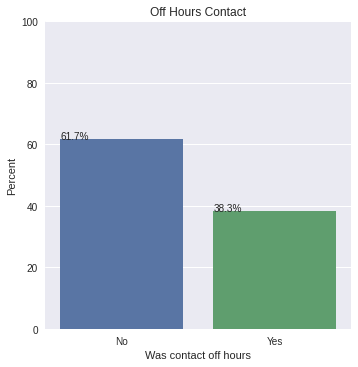

In [30]:
g = sns.catplot(x='index', y='Percent', kind='bar', data=new_df)
plt.style.use('seaborn')
plt.title('Off Hours Contact')
plt.xlabel('Was contact off hours')
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.ylim(0,100);
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

# [Model in a separate Colab](https://colab.research.google.com/drive/1yS7gVKGAI_-aj19BhInKspsJRKMtvmMt?usp=sharing)